<a href="https://colab.research.google.com/github/PratikshaD45/Medical-Insurance-Cost-Prediction/blob/main/medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


data collection and analysis


In [5]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#download and unzip the data from google drive Colab environment
from google_drive_downloader import GoogleDriveDownloader as gdd
#use only file id of the link
#Note: Below link is just an example, Not an actual link. Actual Links are in ReadMe file
#https://drive.google.com/file/d/1ubvKLzBDe5i1acxgGUK6ObeNBYCKUS07/view?usp=sharing
#https://drive.google.com/drive/folders/1zT1YrkOysi9AVFwlOz9hFjCPnZYrUII5?usp=sharing
#https://drive.google.com/drive/folders/1c0mmvBdG384BXQBSqmLjq0J1mtqtTgul?usp=sharing
#https://drive.google.com/drive/folders/1m8ohNTgT9CndRF24xMfAvYlMK3y7sKnK?usp=sharing
# https://drive.google.com/drive/folders/1zT1YrkOysi9AVFwlOz9hFjCPnZYrUII5?usp=sharing
# https://drive.google.com/drive/folders/1m8ohNTgT9CndRF24xMfAvYlMK3y7sKnK?usp=sharing
# https://drive.google.com/file/d/1_xVsJhNfsQQfLM2a0cL4NpVl1Uivc3m1/view?usp=sharing


url = '1_xVsJhNfsQQfLM2a0cL4NpVl1Uivc3m1'
gdd.download_file_from_google_drive(file_id = url,dest_path='./data.zip',unzip=True)

Unzipping...

/usr/local/lib/python3.10/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1_xVsJhNfsQQfLM2a0cL4NpVl1Uivc3m1" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [8]:
insurance_dataset = pd.read_csv('/content/Train_Data.csv')

In [9]:
insurance_dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [10]:
insurance_dataset.shape

(3630, 7)

In [11]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


Categorical feaures:

1.Sex

2.Smoker

3.region


In [12]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

Data analysis

In [13]:
insurance_dataset.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

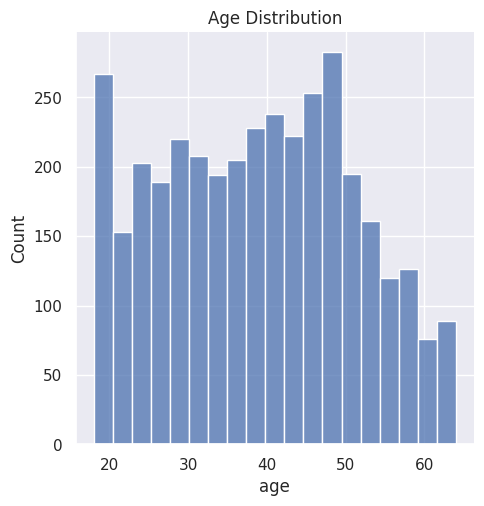

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()

male      2029
female    1601
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

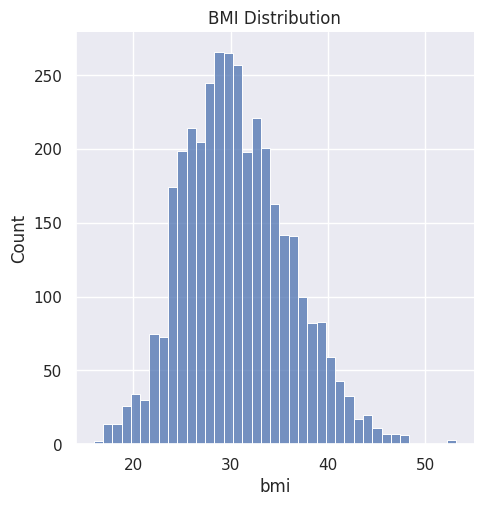

In [16]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

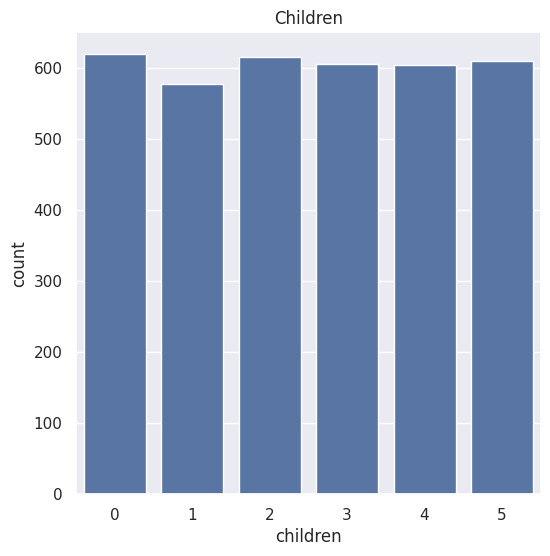

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()


In [18]:
insurance_dataset['children'].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

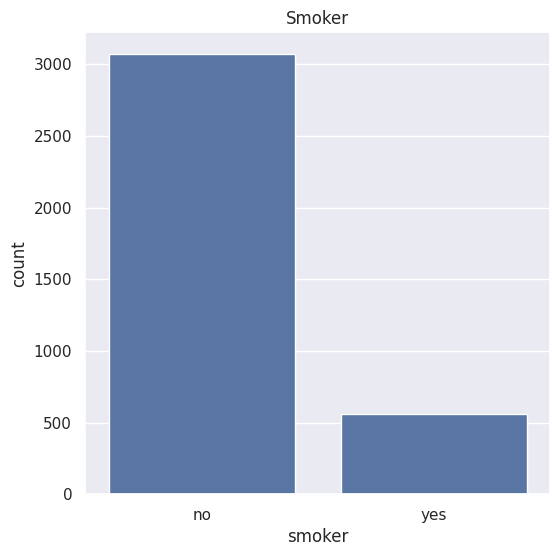

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()


In [20]:
insurance_dataset['smoker'].value_counts()

no     3070
yes     560
Name: smoker, dtype: int64

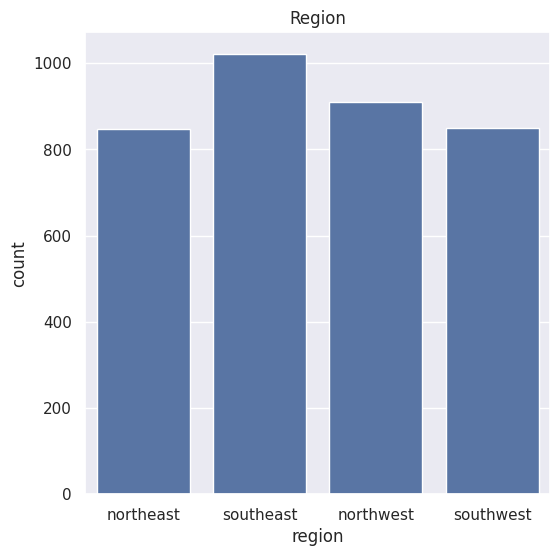

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [22]:
insurance_dataset['region'].value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

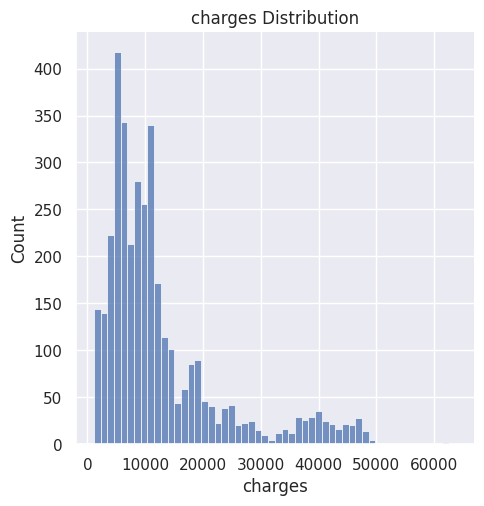

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

Data pre-processing


In [24]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [25]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [26]:
print(X)

            age  sex        bmi  smoker  region  children
0     21.000000    0  25.745000       1       2         2
1     36.976978    1  25.744165       0       0         3
2     18.000000    0  30.030000       1       0         1
3     37.000000    0  30.676891       1       2         3
4     58.000000    0  32.010000       1       0         1
...         ...  ...        ...     ...     ...       ...
3625  48.820767    1  41.426984       1       3         4
3626  38.661977    1  26.202557       1       0         2
3627  56.000000    0  40.300000       1       1         0
3628  48.061207    1  34.930624       1       0         1
3629  37.598865    1  25.219233       1       2         3

[3630 rows x 6 columns]


In [27]:
print(Y)

0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64


In [29]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(3630, 6) (2904, 6) (726, 6)


Model Training


Linear Regression

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [33]:
training_data_prediction= regressor.predict(X_train)

In [34]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.6969959791129544


In [35]:
test_data_prediction = regressor.predict(X_test)

In [36]:
r2_test = metrics.r2_score(Y_test ,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7548725700771287


Building a predictive System

In [37]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])


[26179.11783618]
The insurance cost is USD 26179.117836180107


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
